# Integrantes: Iván Alejandro Miguel Viola, Ignacio Joaquin Gallardo, Gonzalo Nicolas Moreira Valdez.

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from formulaic import Formula
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
sube = pd.read_csv("Datos/sube-2023.csv")
Ej1a = pd.read_csv("Datos/sube-2023.csv")

sube_2020 = pd.read_csv("Datos/sube-2020.csv")
sube_2021 = pd.read_csv("Datos/sube-2021.csv")
sube_2022 = pd.read_csv("Datos/sube-2022.csv")

sube.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


# Procesamiento de datos

## Ejercicio 1

### a)

In [3]:
Ej1a["DIA_TRANSPORTE"] = Ej1a["DIA_TRANSPORTE"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

Ej1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472291 entries, 0 to 472290
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DIA_TRANSPORTE   472291 non-null  datetime64[ns]
 1   NOMBRE_EMPRESA   472291 non-null  object        
 2   LINEA            472291 non-null  object        
 3   AMBA             472291 non-null  object        
 4   TIPO_TRANSPORTE  472291 non-null  object        
 5   JURISDICCION     469742 non-null  object        
 6   PROVINCIA        469720 non-null  object        
 7   MUNICIPIO        469720 non-null  object        
 8   CANTIDAD         472291 non-null  int64         
 9   DATO_PRELIMINAR  472291 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 36.0+ MB


In [4]:
Ej1a.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


### b)

In [5]:
Ej1a.insert(10, "FECHA_DIA", Ej1a["DIA_TRANSPORTE"].apply(lambda x: x.day_name()[0:3]))
Ej1a.insert(11, "FECHA_ORDINAL", Ej1a["DIA_TRANSPORTE"].apply(lambda x: x.toordinal()-738520))
Ej1a.insert(12, "FECHA_MES", Ej1a["DIA_TRANSPORTE"].apply(lambda x: f'{x.month:02d}'))


Ej1a

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,01
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,01
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,01
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,01
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472286,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL A,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,28,NO,Sun,365,12
472287,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL B,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,38,NO,Sun,365,12
472288,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL C,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,54,NO,Sun,365,12
472289,2023-12-31,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL D,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,52,NO,Sun,365,12


## Ejercicio 2

In [6]:
datos_amba = Ej1a.copy()

col_orden = ["fecha", "fecha_dia", "fecha_mes", "fecha_ordinal","jurisdiccion", "linea","pasajeros", "tipo_transporte"]

datos_amba = datos_amba[datos_amba["AMBA"] == "SI"]

datos_amba = datos_amba.drop(columns=["AMBA","NOMBRE_EMPRESA","PROVINCIA","MUNICIPIO","DATO_PRELIMINAR"])

datos_amba = datos_amba.rename(str.lower, axis='columns')

datos_amba = datos_amba.rename(columns={"dia_transporte":"fecha","cantidad":"pasajeros"})

datos_amba = datos_amba[col_orden]

datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,01,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Sun,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


## Ejercicio 3

### a)

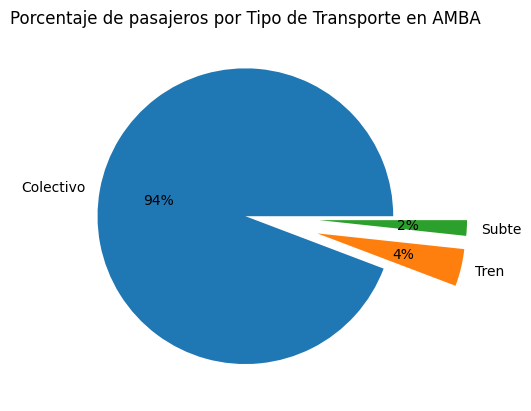

In [7]:
cantidad = datos_amba["tipo_transporte"].value_counts()

data = cantidad.values
keys = ["Colectivo", "Tren", "Subte"]

plt.pie(data, labels=keys,explode=[0,0.5,0.5] , autopct="%.0f%%")
plt.title("Porcentaje de pasajeros por Tipo de Transporte en AMBA")

plt.show()


### b)

In [8]:
subte_amba = datos_amba[datos_amba["tipo_transporte"] == "SUBTE"]

subte_amba = subte_amba[["fecha_mes", "linea", "pasajeros"]] 
    
maximo = subte_amba.loc[subte_amba["pasajeros"].idxmax()]

print(maximo)

fecha_mes         12
linea        LINEA_B
pasajeros     243420
Name: 441161, dtype: object


### c)

In [9]:
dias_habiles_amba_1 = datos_amba[datos_amba["fecha_dia"] != "Sun"]

dias_habiles_amba = dias_habiles_amba_1[dias_habiles_amba_1["fecha_dia"] != "Sat"]

lunes = dias_habiles_amba[dias_habiles_amba["fecha_dia"] == "Mon"]
std_lun = np.std(lunes["pasajeros"])

martes = dias_habiles_amba[dias_habiles_amba["fecha_dia"] == "Tue"]
std_mar = np.std(martes["pasajeros"])

miercoles = dias_habiles_amba[dias_habiles_amba["fecha_dia"] == "Wed"]
std_mie = np.std(miercoles["pasajeros"])

jueves = dias_habiles_amba[dias_habiles_amba["fecha_dia"] == "Thu"]
std_jue = np.std(jueves["pasajeros"])

viernes = dias_habiles_amba[dias_habiles_amba["fecha_dia"] == "Fri"]
std_vie = np.std(viernes["pasajeros"])

dias = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes"]
stds = [std_lun, std_mar, std_mie, std_jue, std_vie]

print(stds)

menos_std_index = np.argmin([std for std in stds])
menos_std = dias[menos_std_index]

print("El día con menos desvío estándar es:", menos_std)

[33573.11170298772, 35830.03729912184, 35976.37801918298, 35963.74834879457, 35055.366074564125]
El día con menos desvío estándar es: Lunes


# Análisis Exploratorio

## Ejercicio 4)

In [10]:
subedia = (sube['DIA_TRANSPORTE'])
subediadf = (pd.DataFrame(sube['DIA_TRANSPORTE'])).drop_duplicates()
subedialist= subediadf['DIA_TRANSPORTE'].to_list()

l= []
for elem in subedialist:
    sumadia = sube[sube['DIA_TRANSPORTE']==elem]['CANTIDAD'].sum()
    l.append(sumadia)

arraysumadedias = np.array(l)

pasjxdia = pd.DataFrame()
pasjxdia['DIA_TRANSPORTE'] = np.array(subedialist)
pasjxdia['CANTIDAD']=arraysumadedias
pasjxdia["DIA_TRANSPORTE"] = pasjxdia["DIA_TRANSPORTE"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
pasjxdia.insert(2, "FECHA_DIA", pasjxdia["DIA_TRANSPORTE"].apply(lambda x: x.day_name()[0:3]))
pasjxdia.insert(3, "FECHA_ORDINAL", pasjxdia["DIA_TRANSPORTE"].apply(lambda x: x.toordinal()-738520))
pasjxdia.insert(4, "FECHA_MES", pasjxdia["DIA_TRANSPORTE"].apply(lambda x: f'{x.month:02d}'))

### Como varia el uso del transporte publico a lo largo del año?

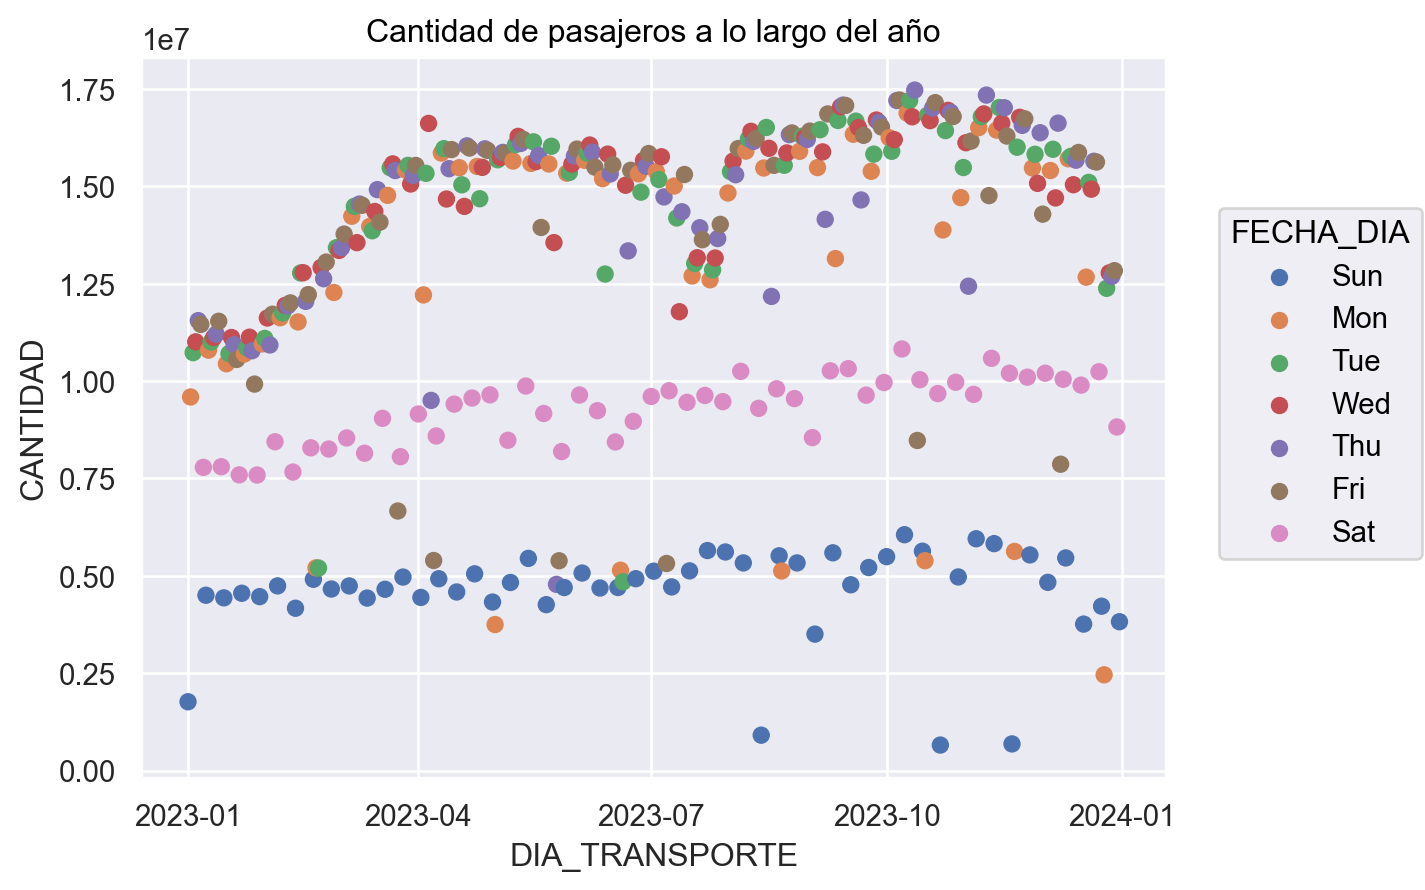

In [11]:
fig1 = (
        so.Plot(data= pasjxdia,x=pasjxdia['DIA_TRANSPORTE'],y=pasjxdia['CANTIDAD'], color='FECHA_DIA')
        .add(so.Dot())
        ).label(title='Cantidad de pasajeros a lo largo del año')

fig1

##### A lo largo del año vemos una tendencia que actúa de bastante de acuerdo a lo que esperábamos, desde enero hasta principios de marzo hay un aumento progresivo, casi cuadrático, en el uso del transporte público, el cual podemos atribuir a que de enero a marzo son los meses deverano y la gente toma sus vacaciones en ese tiempo. La explicación de porque no es constante es simplemente cultural, la temporada de mayor calor y de revuelo turístico en todos los balnearios suele ser enero para disfrutar bien de la plenitud del verano. A partir de fines de marzo/principios de abril el uso se normaliza y se mantiene muy constante en comparación a los meses previos, todoesto hasta que llega mediados de julio. Como ya sabemos a mediados de julio se encuentra el receso de invierno para los estudiantes, lo cual produce una caída bastante notable en el uso del transporte publico, pero no mayor a la caída que se genera en el receso de verano.Posteriormente se vuelve a normalizar cuando el receso termina y se mantiene sin mayores cambios hasta que llega diciembre y empezamos a notar nuevamente los síntomas de la llegada del verano y la caída en la cantidad de pasajeros que usan el transporte público.

### Cómo difiere el uso del transporte público durante los días hábiles en comparación a los fines de semana? Por qué hay datos outliers en días de semana?

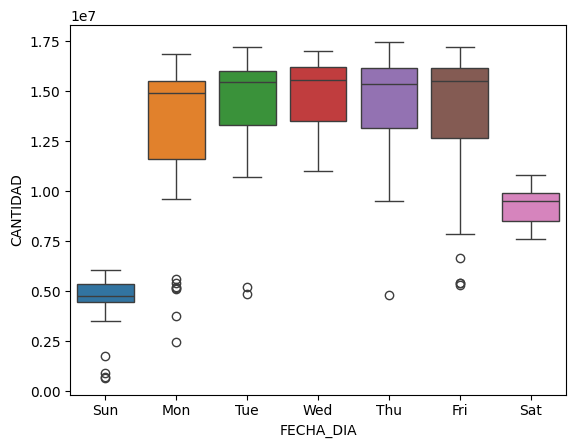

In [12]:
figdif = sns.boxplot(data=pasjxdia,x=pasjxdia['FECHA_DIA'],y=pasjxdia['CANTIDAD'],hue=pasjxdia["FECHA_DIA"],legend=False)

##### Evidentemente los días de semana son los días con mayor movimiento de pasajeros porque son los días hábiles, seguidos por el sábado que también es un día laboral (aunque en menor medida), y por último viene el domingo que muy poca gente trabaja y el movimiento podemos atribuirlo en gran parte a actividades de ocio.

In [13]:
jueves_nacional = pasjxdia[pasjxdia['FECHA_DIA'] == 'Thu']
promedio_jueves = np.mean(jueves_nacional['CANTIDAD'])
veinticinco_de_mayo = jueves_nacional[jueves_nacional['FECHA_ORDINAL'] == 145]
print('El promedio de pasajeros los jueves es:',promedio_jueves)
print('La cantidad de pasajeros el 25 de mayo fue:',veinticinco_de_mayo['CANTIDAD'].item())


El promedio de pasajeros los jueves es: 14523610.096153846
La cantidad de pasajeros el 25 de mayo fue: 4781470


##### Por otro lado, entendemos que los datos outliers son debido a feriados y paros. Por ejemplo, el 25 de mayo fue un outlier. Además, los lunes y viernes tienen más outliers gracias a los fin de semana largos.

### Como evolucionó la cantidad de pasajeros en los últimos años?

In [14]:
sube_total = pd.concat([sube_2020, sube_2021, sube_2022, sube]).reset_index(drop=True)
sube_total["DIA_TRANSPORTE"] = sube_total["DIA_TRANSPORTE"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
sube_total.insert(10, "MES", sube_total["DIA_TRANSPORTE"].apply(lambda x: f'{x.month:02d}'))
sube_total.insert(11, "AÑO", sube_total["DIA_TRANSPORTE"].apply(lambda x:f'{x.year}'))
sube_total_sum = sube_total.groupby(["AÑO", "MES"])["CANTIDAD"].sum().reset_index()
sube_total_sum["AÑO_MES"] = sube_total_sum.apply(lambda row: f"{row['AÑO']}-{row['MES']}", axis=1)

[Text(0.5, 1.0, 'Cantidad de pasajeros a lo largo de los años')]

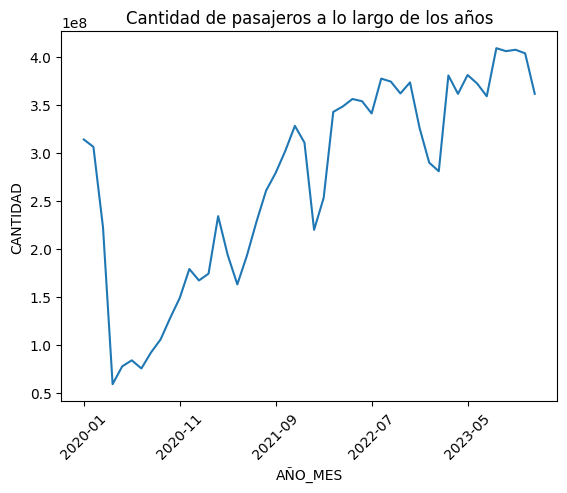

In [15]:
total_pasajeros = (
    sns.lineplot(sube_total_sum, x = "AÑO_MES", y = 'CANTIDAD')
).set(title = 'Cantidad de pasajeros a lo largo de los años')
xticks_step = 10
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.IndexLocator(base=xticks_step, offset=0))
total_pasajeros

##### Podemos ver que al principio de 2020 hubo un decrecimiento masivo en la cantidad de pasajeros debido al comienzo de la pandemia. Desde ese punto la cantidad de pasajeros viene en aumento. Esto se puede atribuir a dos factores: A la salida de la pandemia, que hizo que la gente abandone la virtualidad y vuelva a la presencialidad; por otro lado esto también se puede deber al deterioro de la economía Argentina que generó una caída en la utlización de vehículos personales y un aumento en la demanda del transporte público.

[Text(0.5, 1.0, 'Cantidad de pasajeros a lo largo de los años en AMBA/interior')]

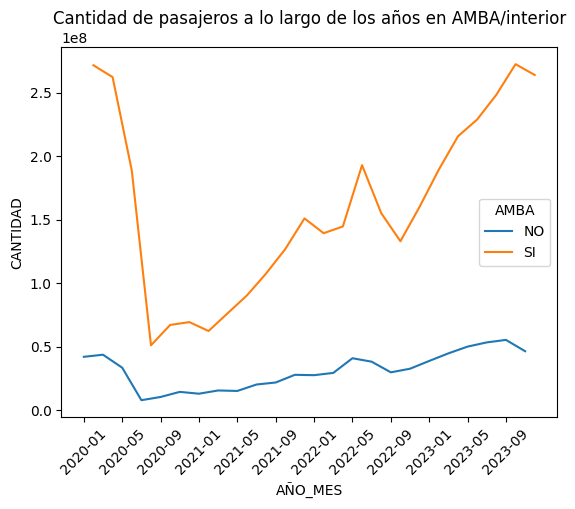

In [16]:
sube_total_amba_interior_sum = sube_total.groupby(["AÑO", "MES", "AMBA"])["CANTIDAD"].sum().reset_index()
sube_total_amba_interior_sum["AÑO_MES"] = sube_total_sum.apply(lambda row: f"{row['AÑO']}-{row['MES']}", axis=1)

total_pasajeros_amba_interior = (
    sns.lineplot(sube_total_amba_interior_sum, x = "AÑO_MES", y = 'CANTIDAD', hue = 'AMBA')
).set(title = 'Cantidad de pasajeros a lo largo de los años en AMBA/interior')
xticks_step = 4
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.IndexLocator(base=xticks_step, offset=0))
total_pasajeros_amba_interior

##### La única diferencia entre AMBA y provincia es que, al haber una mayor cantidad de pasajeros en AMBA, los cambios son más acentuados.

# Modelado

## Ejercicio 5)

### a)

In [18]:
datos_AMBA = pd.read_csv("Datos/sube-2023-regresion.csv")

datos_ColectivoJN = datos_AMBA[datos_AMBA["PROVINCIA"] == "JN"]
datos_Colectivo = datos_ColectivoJN[datos_ColectivoJN["TIPO_TRANSPORTE"] == "COLECTIVO"]
cols = datos_Colectivo.LINEA.unique() # Los nombres de las lineas de colectivo

pasajeros_por_linea = pd.DataFrame()
for col in cols:
    datos_linea = datos_Colectivo[datos_Colectivo.LINEA == col][["DIA_TRANSPORTE", "CANTIDAD"]]
    datos_linea = datos_linea.set_index("DIA_TRANSPORTE").rename(columns = {"CANTIDAD" : col})
    pasajeros_por_linea = pd.concat([pasajeros_por_linea , datos_linea], axis = 1)

pasajeros_por_linea.head()

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA_099,LINEA_119_AMBA,LINEA_164_AMBA,LINEA_902,LINEA_906,LINEA_910_STAFE,LINEA_915_STAFE,STAFE_SANTA FE_LINEA_907,LINEA 908,LINEA 119
DIA_TRANSPORTE,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,1882,1573.0,3210,5310.0,497,4916,30.0,737,NaN,NaN
2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,10322,7345.0,19362,3474.0,1527,10466,307.0,1652,873.0,NaN
2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,11981,7925.0,21784,3500.0,1724,11938,497.0,1368,921.0,NaN
2023-01-05,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,11787,7597.0,22972,3746.0,1923,12246,467.0,1300,930.0,NaN
2023-01-06,10530,26021,26458,24167,53163,35212,16459,12955,63528,16846,...,11567,7811.0,23411,4477.0,2128,13143,576.0,1653,905.0,NaN


### b)

In [19]:
pasajeros_por_linea = pasajeros_por_linea.dropna(axis = 1)

pasajeros_por_linea.head()

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA 7,LINEA 76,LINEA 8,LINEA 911 RIO NEGRO,LINEA 914,LINEA_099,LINEA_164_AMBA,LINEA_906,LINEA_910_STAFE,STAFE_SANTA FE_LINEA_907
DIA_TRANSPORTE,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,2184,3797,5317,904,2744,1882,3210,497,4916,737
2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,12774,17374,23250,7185,7945,10322,19362,1527,10466,1652
2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,13949,19860,26294,8400,8592,11981,21784,1724,11938,1368
2023-01-05,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,14668,21235,27216,8319,8428,11787,22972,1923,12246,1300
2023-01-06,10530,26021,26458,24167,53163,35212,16459,12955,63528,16846,...,14199,23472,27073,8360,9120,11567,23411,2128,13143,1653


### c)

##### Para nuestro primer modelo, elegimos colectivos los cuales tienen una relacion con el recorrido de la linea 9, estos fueron los siguientes: Linea 100, Linea 45, Linea 150, Linea 101 y 75 con la siguiente formula

In [20]:
modelo_1= 'BSAS_LINEA_009~BSAS_LINEA_100 + BSAS_LINEA_045 + BSAS_LINEA_150 + BSAS_LINEA_101 + BSAS_LINEA_075 - 1'

modelo_1

'BSAS_LINEA_009~BSAS_LINEA_100 + BSAS_LINEA_045 + BSAS_LINEA_150 + BSAS_LINEA_101 + BSAS_LINEA_075 - 1'

##### Para nuestro segundo modelo, vamos a elegir colectivos los cuales no tiene relacion alguna con el recorrido del 109, esto para analizar si la similitud del recorrido afecta a nuestro arreglo. Para esto elegimos las siguientes lineas: Linea 71, Linea 12, Linea 42, Linea 109 y Linea 146

In [21]:
modelo_2 = 'BSAS_LINEA_009~BSAS_LINEA_071 + BSAS_LINEA_012 + LINEA_42 + BSAS_LINEA_109 + BSAS_LINEA_146 - 1'

modelo_2

'BSAS_LINEA_009~BSAS_LINEA_071 + BSAS_LINEA_012 + LINEA_42 + BSAS_LINEA_109 + BSAS_LINEA_146 - 1'

##### Para nuestro tercer modelo, decidimos ver que colectivos son los mas parecidos en pasajeros al de la linea 109, para esto vemos que colectivos tienen cantidad de pasajeros mas cercano

In [22]:
relacion_linea_009 =pasajeros_por_linea.corr()["BSAS_LINEA_009"]

print("Mas parecidos al 109: ", relacion_linea_009.sort_values(ascending = False).head(6))

Mas parecidos al 109:  BSAS_LINEA_009    1.000000
LINEA 101         0.976802
BSAS_LINEA_146    0.975382
LINEA 7           0.974210
BSAS_LINEA_024    0.973111
LINEA 107         0.972397
Name: BSAS_LINEA_009, dtype: float64


##### Como podemos ver las lineas 101, 146, 7, 24 y 107 son las que mas se acercan a los pasajeros de la linea 109. Por lo tanto vamos a usarlos para nuestro tercer modelo

In [23]:
modelo_3 = 'BSAS_LINEA_009~BSAS_LINEA_101+BSAS_LINEA_146+LINEA_7+LINEA_107+BSAS_LINEA_024 - 1'

modelo_3

'BSAS_LINEA_009~BSAS_LINEA_101+BSAS_LINEA_146+LINEA_7+LINEA_107+BSAS_LINEA_024 - 1'

### d)

##### No elegimos ningun modelo de regresión de ridge, por lo tanto no necesitamos ajustar un $\alpha$

### e)

##### Vamos a realizar una validacion cruzada de los 3 metodos selecionados

##### Primero antes de eso vamos a crear nuestros conjuntos de test y entrenamiento

In [24]:
datos_train,datos_test= train_test_split(pasajeros_por_linea,test_size=0.2,random_state=57)

datos_train = datos_train.rename(columns={'LINEA 7':'LINEA_7','LINEA 101':'BSAS_LINEA_101','LINEA 12':'BSAS_LINEA_012','LINEA 42':'LINEA_42','LINEA 107':'LINEA_107'})

datos_test = datos_test.rename(columns={'LINEA 7':'LINEA_7','LINEA 101':'BSAS_LINEA_101','LINEA 12':'BSAS_LINEA_012','LINEA 42':'LINEA_42','LINEA 107':'LINEA_107'})

#### Modelo 1:

In [25]:
y_train0,x_train0= Formula(modelo_1).get_model_matrix(datos_train)

cv = KFold(n_splits=5, random_state=42, shuffle=True)

modeloCV1 = LinearRegression(fit_intercept = True)    # Inicializamos un modelo de Regresion Lineal sin intercept
rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0
for train_index, val_index in cv.split(x_train0):
    X_train, X_val, y_train, y_val = x_train0.iloc[train_index], x_train0.iloc[val_index], y_train0.iloc[train_index], y_train0.iloc[val_index]

    modeloCV1.fit(X_train, y_train)
    
    y_pred = modeloCV1.predict(X_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse1.mean())

2146.423255020159


#### Modelo 2:

In [26]:
y_train1,x_train1= Formula(modelo_2).get_model_matrix(datos_train)

cv = KFold(n_splits=5, random_state=42, shuffle=True)

modeloCV2 = LinearRegression(fit_intercept = True)    # Inicializamos un modelo de Regresion Lineal sin intercept
rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0
for train_index, val_index in cv.split(x_train1):
    X_train, X_val, y_train, y_val = x_train1.iloc[train_index], x_train1.iloc[val_index], y_train1.iloc[train_index], y_train1.iloc[val_index]

    modeloCV2.fit(X_train, y_train)
    
    y_pred = modeloCV2.predict(X_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse1.mean())

2280.692919001319


#### Modelo 3:

In [27]:
y_train2,x_train2= Formula(modelo_3).get_model_matrix(datos_train)

cv = KFold(n_splits=5, random_state=42, shuffle=True)

modeloCV3 = LinearRegression(fit_intercept = True)    # Inicializamos un modelo de Regresion Lineal sin intercept
rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0
for train_index, val_index in cv.split(x_train2):
    X_train, X_val, y_train, y_val = x_train2.iloc[train_index], x_train2.iloc[val_index], y_train2.iloc[train_index], y_train2.iloc[val_index]

    modeloCV3.fit(X_train, y_train)
    
    y_pred = modeloCV3.predict(X_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse1.mean())

2143.440278203765


##### Como podemos ver, el tercer modelo es el que menor RECM tiene. Por lo tanto este va a ser nuestro modelo 

### f) 

##### Ahora con nuestro modelo elegido. Ajustemoslo a nuestro conjunto de testeo

In [28]:
modeloCV3.fit(x_train2, y_train2)

y_test, X_test = (
    Formula(modelo_3)
    .get_model_matrix(datos_test)
)

y_pred = modeloCV3.predict(X_test)
# Bondad del ajuste
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))
print("Coeficientes: ", modeloCV3.coef_)
print ("Intercept: ", modeloCV3.intercept_)

R^2:  0.9782133270560053
Raiz cuadarada del ECM:  1498.5587544956704
Coeficientes:  [[0.29125058 0.22947462 0.51735605 0.03631575 0.02948305]]
Intercept:  [94.85214569]


##### Ya con el modelo ajustado, podemos ver la ecuacion final que va a ser:

##### Linea_9 = 94,85 + 0.29 * Linea_101 + 0.23 * Linea_146 + 0.52 * Linea_7 + 0.04 * Linea_107 + 0.03 * Linea_24